#  Создание и настройка нейронной сети при помощи пакета `torch`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.html
* https://pytorch.org/docs/stable/optim.html
* https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html
* https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html
* https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html
* https://saturncloud.io/blog/can-i-use-tensorboard-with-google-colab/

## Задачи для совместного разбора

1\. Используя собственную реализацию нейрона и пакетного градиентного спуска, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE.

In [1]:
from sklearn.datasets import make_regression
import torch as th
X, y, coef = make_regression(
    n_features=4,
    n_informative=4,
    coef=True,
    bias=0.5,
    random_state=42
)
X = th.FloatTensor(X)
y = th.FloatTensor(y)

In [46]:
import torch
class Neuron:
  def __init__(self, n_inputs, requires_grad=False):
    self.weights = torch.normal(0, 1, (n_inputs, 1), requires_grad=requires_grad)
    self.bias = torch.normal(0, 1, (1, ), requires_grad=requires_grad)

  def forward(self, inputs):
    return inputs @ self.weights + self.bias

In [47]:
class MSE_Loss:
  def forward(self, y_pred, y_true):
    return (y_pred - y_true).pow(2).mean()

In [ ]:
n_epochs = 100
gamma = 0.1
neuron = Neuron(n_inputs=4, requires_grad=True)
criterion = Loss()

for epoch in range(100):
  # 1. forward pass
  out = neuron.forward(X).flatten()
  loss = criterion.forward(out, y)
  # 2. backprop
  loss.backward()
  # 3. gradient descend
  with th.no_grad():
    neuron.weights -= gamma * neuron.weights.grad
    neuron.bias -= gamma * neuron.bias.grad

  # neuron.weights.data -= gamma * neuron.weights.grad
  # neuron.bias.data -= gamma * neuron.bias.grad

  # 4. zero grads
  neuron.weights.grad.zero_()
  neuron.bias.grad.zero_()

  print(f"{epoch=} {loss.item()=}")

In [ ]:
out.shape

In [ ]:
y.shape

In [ ]:
loss.backward()

In [ ]:
neuron.weights.grad

2\. Используя реализацию нейрона из `torch.nn`, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE. Для настройки весов реализуйте пакетный градиентный спуск с использованием `torch.optim`.

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
n_epochs = 100
gamma = 0.1
neuron = nn.Linear(in_features=4, out_features=1)
criterion = nn.MSELoss()
optimizer = optim.SGD(neuron.parameters(), lr=gamma)

for epoch in range(100):
  # 1. forward pass
  out = neuron(X).flatten()
  loss = criterion(out, y)
  # 2. backprop
  loss.backward()
  # 3. gradient descend
  optimizer.step()
  # 4. zero grads
  optimizer.zero_grad()

  print(f"{epoch=} {loss.item()=}")

3\. Добавьте визуализацию изменения значения функции потерь во время обучения, используя `tensorboard`.

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
writer = SummaryWriter("runs")

In [ ]:
!kill 1892

In [ ]:
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

In [48]:
from sklearn.datasets import make_classification
import torch as th
X, y = make_classification()
X = th.FloatTensor(X)
y = th.FloatTensor(y).long()

In [ ]:
X.shape

torch.Size([100, 20])

In [ ]:
y.unique()

tensor([0., 1.])

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
y

tensor([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 1])

In [49]:
n_epochs = 100
gamma = 0.1
neuron = nn.Linear(in_features=20, out_features=len(y.unique()))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(neuron.parameters(), lr=gamma)

for epoch in range(100):
  # 1. forward pass
  out = neuron(X)
  print(out)
  loss = criterion(out, y)
  # 2. backprop
  loss.backward()
  # 3. gradient descend
  optimizer.step()
  # 4. zero grads
  optimizer.zero_grad()

  print(f"{epoch=} {loss.item()=}")

Выходные данные были обрезаны до нескольких последних строк (5000).
        [ 1.2578e+00, -1.6758e+00],
        [ 1.6114e+00, -9.4121e-01],
        [ 1.5938e+00, -5.4642e-01],
        [-3.3002e+00,  1.0533e+00],
        [ 9.7074e-01, -1.4765e+00],
        [ 2.4054e-01, -1.5332e+00],
        [-1.9316e+00,  5.8976e-01],
        [ 1.8801e+00, -4.8974e-01],
        [ 3.1587e-01, -1.2220e+00],
        [-1.0871e+00,  6.4105e-01],
        [-2.4327e-01,  6.2316e-01],
        [-2.6349e+00,  9.6212e-01],
        [-1.0213e+00,  1.7374e+00],
        [ 9.3382e-01, -1.3448e+00],
        [-1.0242e+00,  1.1381e+00],
        [ 2.0546e+00,  5.6558e-02],
        [ 2.0154e+00, -3.8596e-01],
        [-5.5085e-01, -2.6116e-01],
        [ 1.3669e+00, -9.2005e-01],
        [-1.4265e+00,  4.1842e-01],
        [ 2.6725e+00, -6.1881e-01],
        [ 2.3720e+00, -1.2222e+00],
        [ 1.1388e+00, -1.0781e+00],
        [ 1.5934e+00, -2.2172e+00],
        [ 4.5843e-01, -1.6403e+00],
        [ 9.8843e-01, -9.9024e-0

In [ ]:
out

In [9]:
class Net:
  def __init__(self, fc1, act, fc2, criterion):
    self.fc1 = fc1
    self.act = act
    self.fc2 = fc2
    self.criterion = criterion

  def forward(self, X):
    out = self.fc1.forward(X)
    out = self.act.forward(out)
    out = self.fc2.forward(out)
    return out

  def fit(self, X, y, gamma=0.001, n_epoch=100):
    for epoch in range(n_epoch):
      out1 = self.forward(X)

      loss = self.criterion.forward(out1, y)
      loss.backward()

      with th.no_grad():
        self.fc1.weights -= gamma * self.fc1.weights.grad
        self.fc1.bias -= gamma * self.fc1.bias.grad
        self.fc2.weights -= gamma * self.fc2.weights.grad
        self.fc2.bias -= gamma * self.fc2.bias.grad

        self.fc1.weights.grad.zero_()
        self.fc1.bias.grad.zero_()
        self.fc2.weights.grad.zero_()
        self.fc2.bias.grad.zero_()

In [14]:
n_test = Net(Neuron(1, 10), ReLU(), Neuron(10, 1), MSE_Loss())
loss0 = ((n_test.forward(X)-y)**2).mean()
print(f'loss0 = {loss0}')
n_test.fit(X, y, gamma=0.1)
loss_fitted = ((n_test.forward(X)-y)**2).mean()
print(f'loss_fitted = {loss_fitted}')

loss0 = 0.822551429271698
loss_fitted = 0.1429351270198822


## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя собственную реализацию полносвязного слоя и мини-пакетного градиентного спуска, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

- [ ] Проверено на семинаре

In [2]:
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_regression
import torch as th
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt

In [161]:
class Neuron:
  def __init__(self, n_inputs, n_outputs, requires_grad=True):
    self.weights = torch.normal(0, 1, (n_inputs, n_outputs), requires_grad=requires_grad)
    self.bias = torch.normal(0, 1, (1, ), requires_grad=requires_grad)

  def forward(self, inputs):
    return inputs @ self.weights + self.bias

class ReLU:
  def forward(self, x):
	  return th.where(x > 0, x, 0)

class MSE_Loss:
  def forward(self, y_pred, y_true):
    return (y_pred - y_true).pow(2).mean()

In [158]:
import torch

X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())

In [162]:
class Net_minibatch:
  def __init__(self, fc1, act, fc2, criterion):
    self.fc1 = fc1
    self.act = act
    self.fc2 = fc2
    self.criterion = criterion

  def forward(self, X):
    out = self.fc1.forward(X)
    out = self.act.forward(out)
    out = self.fc2.forward(out)
    return out

  def fit(self, X, y, gamma=0.01, batch_size=10, n_epoch=100):
    df = th.cat([X,y], axis=-1)
    for _ in range(n_epoch):
      batches = DataLoader(df, batch_size=batch_size, shuffle=True)
      for batch in batches:
        X_, y_ = batch[:,:-1], batch[:,-1]
        out1 = self.forward(X_)

        loss = self.criterion.forward(out1, y_)
        print(f'loss = {loss.item()}')
        loss.backward()

        with th.no_grad():
          self.fc1.weights -= gamma * self.fc1.weights.grad
          self.fc1.bias -= gamma * self.fc1.bias.grad
          self.fc2.weights -= gamma * self.fc2.weights.grad
          self.fc2.bias -= gamma * self.fc2.bias.grad

          self.fc1.weights.grad.zero_()
          self.fc1.bias.grad.zero_()
          self.fc2.weights.grad.zero_()
          self.fc2.bias.grad.zero_()

In [169]:
criterion = torch.nn.MSELoss()
n_test = Net_minibatch(Neuron(1, 10), ReLU(), Neuron(10, 1), MSE_Loss())
loss0 = criterion(n_test.forward(X),y)
n_test.fit(X, y, gamma=0.1)
print('---')
print(f'loss0 = {loss0}')
loss_fitted = criterion(n_test.forward(X), y)
print(f'loss_fitted = {loss_fitted}')

loss = 1.5894598960876465
loss = 0.5641245245933533
loss = 0.6940994262695312
loss = 0.5646881461143494
loss = 0.7461092472076416
loss = 0.7891584634780884
loss = 0.3340311348438263
loss = 0.49013569951057434
loss = 0.6222459673881531
loss = 0.46537211537361145
loss = 0.3583739399909973
loss = 0.45837533473968506
loss = 0.4227946102619171
loss = 0.6116182208061218
loss = 0.5234260559082031
loss = 0.5867339372634888
loss = 0.5273081064224243
loss = 0.6808629631996155
loss = 0.7113955020904541
loss = 0.47131621837615967
loss = 0.5000339150428772
loss = 0.39105984568595886
loss = 0.27564582228660583
loss = 0.5878008604049683
loss = 0.49563881754875183
loss = 0.5086092948913574
loss = 0.6048591732978821
loss = 0.6046509742736816
loss = 0.6353708505630493
loss = 0.5067904591560364
loss = 0.6599839925765991
loss = 0.33687373995780945
loss = 0.6621655225753784
loss = 0.5409972071647644
loss = 0.4612056612968445
loss = 0.8044941425323486
loss = 0.23438113927841187
loss = 0.35640713572502136
lo

<p class="task" id="2"></p>

2\. Используя реализацию полносвязного слоя из `torch.nn` решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`. Для создания модели опишите класс `Net`.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

- [ ] Проверено на семинаре

In [166]:
class Net(nn.Module):
  def __init__(self, lay1_in, lay1_out, lay2_out):
      super(Net, self).__init__()
      self.act = nn.ReLU()
      self.fc1 = nn.Linear(lay1_in,lay1_out)
      self.fc2 = nn.Linear(lay1_out, lay2_out)

  def forward(self, x):
      x = self.fc1(x)
      x = self.act(x)
      x = self.fc2(x)
      return x

In [167]:
import torch

X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())

In [168]:
lay1_in, lay1_out, lay2_out = 1, 10, 1
n_epoch = 100
model = Net(lay1_in, lay1_out, lay2_out)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
loss0 = criterion(model(X),y)

# mini-batch
df = th.cat([X,y], axis=-1)

for _ in range(n_epoch):
  batches = DataLoader(df, batch_size=10, shuffle=True)

  for batch in batches:
    X_, y_ = batch[:,:-1], batch[:,-1]
    y_pred = model(X_)
    loss = criterion(y_pred.flatten(), y_)
    print(f'loss = {loss.item()}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('---')
print(f'loss0 = {loss0}')
loss_fitted = criterion(model(X), y)
print(f'loss_fitted = {loss_fitted}')

loss = 0.5256707668304443
loss = 0.48743993043899536
loss = 0.4063303470611572
loss = 0.4326309263706207
loss = 0.20232956111431122
loss = 0.30667680501937866
loss = 0.31097689270973206
loss = 0.4550512433052063
loss = 0.3250581622123718
loss = 0.48190099000930786
loss = 0.407961905002594
loss = 0.3546221852302551
loss = 0.1666456162929535
loss = 0.5204832553863525
loss = 0.0883261114358902
loss = 0.25519484281539917
loss = 0.5376344323158264
loss = 0.39535993337631226
loss = 0.23607715964317322
loss = 0.46674007177352905
loss = 0.2826557159423828
loss = 0.28132081031799316
loss = 0.3577752709388733
loss = 0.3007771074771881
loss = 0.28131917119026184
loss = 0.3658514618873596
loss = 0.1568174958229065
loss = 0.26576903462409973
loss = 0.14976570010185242
loss = 0.2502674460411072
loss = 0.33094584941864014
loss = 0.18293775618076324
loss = 0.30151793360710144
loss = 0.19347281754016876
loss = 0.1747456043958664
loss = 0.36209243535995483
loss = 0.2445785105228424
loss = 0.251522690057

<p class="task" id="3"></p>

3\. Используя реализацию полносвязного слоя из `torch.nn`, решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`. Для создания модели создайте объект класса `nn.Sequential`.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

- [ ] Проверено на семинаре

In [170]:
import torch

X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())

In [171]:
lay1_in, lay1_out, lay2_out = 1, 10, 1
model = nn.Sequential(
          nn.Linear(lay1_in,lay1_out),
          nn.ReLU(),
          nn.Linear(lay1_out,lay2_out),
        )

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
loss0 = criterion(model(X),y)

# mini-batch
df = th.cat([X,y], axis=-1)
for _ in range(n_epoch):
  batches = DataLoader(df, batch_size=10, shuffle=True)

  for batch in batches:
    X_, y_ = batch[:,:-1], batch[:,-1]
    y_pred = model(X_)
    loss = criterion(y_pred.flatten(), y_)
    print(f'loss = {loss.item()}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('---')
print(f'loss0 = {loss0}')
loss_fitted = criterion(model(X), y)
print(f'loss_fitted = {loss_fitted}')

loss = 0.5897334218025208
loss = 0.3621240556240082
loss = 0.44547730684280396
loss = 0.7017675638198853
loss = 0.5509315729141235
loss = 0.7797579169273376
loss = 0.5669970512390137
loss = 0.560582160949707
loss = 0.3858001232147217
loss = 0.6048561334609985
loss = 0.3236997127532959
loss = 0.49931105971336365
loss = 0.3858407735824585
loss = 0.5630050897598267
loss = 0.48498648405075073
loss = 0.4664219915866852
loss = 0.25794485211372375
loss = 0.4741336703300476
loss = 0.5261486172676086
loss = 0.46993476152420044
loss = 0.6066840887069702
loss = 0.5253904461860657
loss = 0.45870667695999146
loss = 0.5204194188117981
loss = 0.3121991753578186
loss = 0.4078153669834137
loss = 0.47343379259109497
loss = 0.41629758477211
loss = 0.328264057636261
loss = 0.30290529131889343
loss = 0.35623475909233093
loss = 0.24780075252056122
loss = 0.6309236884117126
loss = 0.48549604415893555
loss = 0.36475110054016113
loss = 0.15452301502227783
loss = 0.18021540343761444
loss = 0.3424869179725647
lo

<p class="task" id="4"></p>

4\. Используя реализацию полносвязного слоя из `torch.nn`, решите задачу классификации. В качестве функции потерь используйте реализацию `CrossEntropyLoss` из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`.

Создайте и настройте две модели.

Модель 1:
1. Полносвязный слой с 10 нейронами;
3. Полносвязный слой с 2 нейронами.

Модель 2:
1. Полносвязный слой с 10 нейронами;
2. Функция активации ReLU;
3. Полносвязный слой с 2 нейронами.

Для каждой модели выведите отчет по классификации и визуализацию результатов, где точки раскрашены в цвет наиболее вероятного класса.

- [ ] Проверено на семинаре

In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

def report(y_pred, y):
  print('accuracy_score:', accuracy_score(y,y_pred))
  print('recall_score:', recall_score(y,y_pred))
  print('precision_score:', precision_score(y,y_pred))
  print('roc_auc_score:', roc_auc_score(y,y_pred))
  print('f1_score:', f1_score(y,y_pred))

In [172]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
X = th.FloatTensor(X)
y = th.LongTensor(y)

In [175]:
gamma = 0.1
lay1_in, lay1_out, lay2_out = 2, 10, 2
model = nn.Sequential(
          nn.Linear(lay1_in,lay1_out),
          nn.Linear(lay1_out,lay2_out),
        )
criterion = nn.CrossEntropyLoss()
loss0 = criterion(model(X),y)
optimizer = optim.SGD(model.parameters(), lr=gamma)

# mini-batch
df = th.cat([X,y.reshape(-1,1)], axis=-1)

for _ in range(n_epoch):
  batches = DataLoader(df, batch_size=100, shuffle=True)

  for batch in batches:
    X_, y_ = batch[:,:-1], batch[:,-1]
    y_pred = model(X_)
    y_ = y_.type(torch.LongTensor)
    loss = criterion(y_pred, y_)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    print(f'loss = {loss.item()}')

print('---')
print(f'loss0 = {loss0}')
loss_fitted = criterion(model(X), y)
print(f'loss_fitted = {loss_fitted}')

loss = 0.6982462406158447
loss = 0.7353762984275818
loss = 0.6978174448013306
loss = 0.719368040561676
loss = 0.6978294849395752
loss = 0.6956660747528076
loss = 0.6996696591377258
loss = 0.7095024585723877
loss = 0.6961538791656494
loss = 0.7036580443382263
loss = 0.6985334157943726
loss = 0.710972011089325
loss = 0.7020244002342224
loss = 0.7077656388282776
loss = 0.6877447366714478
loss = 0.7010800838470459
loss = 0.7026603817939758
loss = 0.6818752288818359
loss = 0.6956056356430054
loss = 0.6934465169906616
loss = 0.6933063268661499
loss = 0.6959100365638733
loss = 0.7079762816429138
loss = 0.7026228308677673
loss = 0.6949138641357422
loss = 0.7007888555526733
loss = 0.694624125957489
loss = 0.6931200623512268
loss = 0.6927522420883179
loss = 0.6883946061134338
loss = 0.6817220449447632
loss = 0.7073001265525818
loss = 0.6916670799255371
loss = 0.6919772624969482
loss = 0.696616530418396
loss = 0.6863258481025696
loss = 0.7009402513504028
loss = 0.6996656656265259
loss = 0.6979995

In [176]:
y_pred_model1 = model(X).argmax(axis=1)
report(y_pred_model1, y)

accuracy_score: 0.502
recall_score: 0.478
precision_score: 0.5021008403361344
roc_auc_score: 0.502
f1_score: 0.48975409836065575


Text(0.5, 1.0, 'Predicted classes')

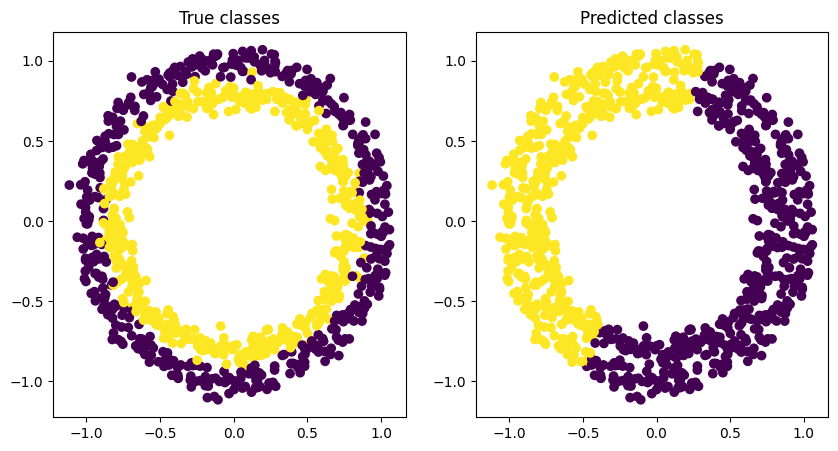

In [177]:
fig = plt.figure(figsize=(10,5))

ax = plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y)
ax.set_title('True classes')

ax = plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c=y_pred_model1)
ax.set_title('Predicted classes')

### Model 2

In [186]:
gamma = 0.5
lay1_in, lay1_out, lay2_out = 2, 10, 2
model = nn.Sequential(
          nn.Linear(lay1_in,lay1_out),
          nn.ReLU(),
          nn.Linear(lay1_out,lay2_out),
        )
criterion = nn.CrossEntropyLoss()
loss0 = criterion(model(X),y)
optimizer = optim.SGD(model.parameters(), lr=gamma)

# mini-batch
df = th.cat([X,y.reshape(-1,1)], axis=-1)
for _ in range(n_epoch):
  batches = DataLoader(df, batch_size=100, shuffle=True)

  for batch in batches:
    X_, y_ = batch[:,:-1], batch[:,-1]
    y_pred = model(X_)
    y_ = y_.type(torch.LongTensor)
    loss = criterion(y_pred, y_)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    print(f'loss = {loss.item()}')

print('---')
print(f'loss0 = {loss0}')
loss_fitted = criterion(model(X), y)
print(f'loss_fitted = {loss_fitted}')

loss = 0.6941185593605042
loss = 0.681428074836731
loss = 0.7132356762886047
loss = 0.7073042392730713
loss = 0.6987598538398743
loss = 0.6969147324562073
loss = 0.6883084177970886
loss = 0.6922473311424255
loss = 0.6842559576034546
loss = 0.703248918056488
loss = 0.6939029097557068
loss = 0.6787084341049194
loss = 0.7169204950332642
loss = 0.6857278347015381
loss = 0.6976264119148254
loss = 0.6866294145584106
loss = 0.6849558353424072
loss = 0.6892645955085754
loss = 0.7142221927642822
loss = 0.6779347062110901
loss = 0.7055132389068604
loss = 0.6823275089263916
loss = 0.6875086426734924
loss = 0.6834593415260315
loss = 0.6882391571998596
loss = 0.6895321607589722
loss = 0.6816680431365967
loss = 0.6825607419013977
loss = 0.6704376339912415
loss = 0.6825138926506042
loss = 0.6767229437828064
loss = 0.6743494272232056
loss = 0.6864572167396545
loss = 0.6760837435722351
loss = 0.7070530652999878
loss = 0.6793705821037292
loss = 0.6816272735595703
loss = 0.6787974834442139
loss = 0.68207

In [187]:
y_pred_model1 = model(X).argmax(axis=1)
report(y_pred_model1, y)

accuracy_score: 0.973
recall_score: 0.964
precision_score: 0.9816700610997964
roc_auc_score: 0.973
f1_score: 0.9727547931382442


Text(0.5, 1.0, 'Predicted classes')

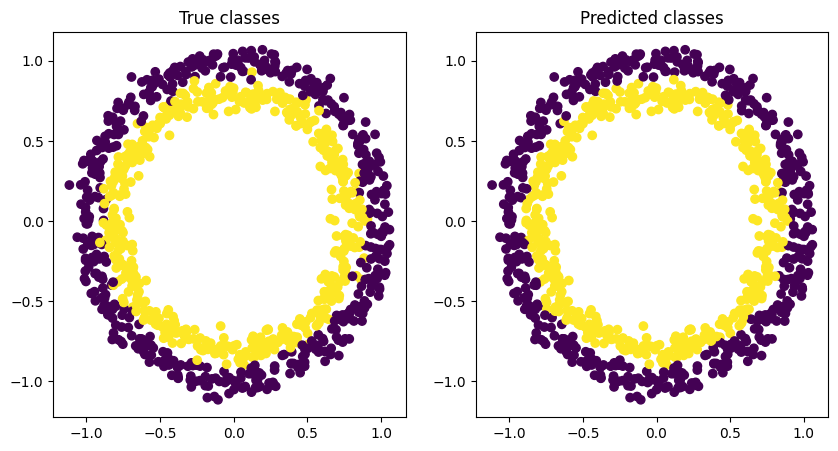

In [188]:
fig = plt.figure(figsize=(10,5))

ax = plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y)
ax.set_title('True classes')

ax = plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c=y_pred_model1)
ax.set_title('Predicted classes')

<p class="task" id="5"></p>

5\. Используя реализацию полносвязного слоя из `torch.nn`, решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`. Перенесите вычисления на GPU и сравните время обучения с и без использования GPU. Решение должно корректно работать в случае отсутствия GPU без дополнительных изменений в коде.

- [ ] Проверено на семинаре

In [20]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(
    n_samples=10000,
    n_features=10,
    n_informative=6,
    coef=True,
    bias=0.5,
    random_state=42
)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

### Без GPU

In [35]:
%%time

lay1_in, lay1_out, lay2_out, lay3_out = 10, 2000, 1500,  1
model = nn.Sequential(
          nn.Linear(lay1_in,lay1_out),
          nn.ReLU(),
          nn.Linear(lay1_out,lay2_out),
          nn.Linear(lay2_out,lay3_out),
          nn.Linear(lay3_out,1)
        )

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
loss0 = criterion(model(X),y)

# mini-batch
df = th.cat([X,y], axis=-1)
batches = DataLoader(df, batch_size=10, shuffle=True)

for batch in batches:
  X_, y_ = batch[:,:-1], batch[:,-1]
  y_pred = model(X_)
  loss = criterion(y_pred.flatten(), y_)
  #print(f'loss = {loss.item()}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print('---')
print(f'loss0 = {loss0}')
loss_fitted = criterion(model(X), y)
print(f'loss_fitted = {loss_fitted}')

---
loss0 = 19312.1328125
loss_fitted = 34.9770393371582
CPU times: user 9.67 s, sys: 201 ms, total: 9.87 s
Wall time: 9.99 s


### C GPU

In [36]:
lay1_in, lay1_out, lay2_out, lay3_out = 10, 2000, 1500,  1
model = nn.Sequential(
          nn.Linear(lay1_in,lay1_out),
          nn.ReLU(),
          nn.Linear(lay1_out,lay2_out),
          nn.Linear(lay2_out,lay3_out),
          nn.Linear(lay3_out,1)
        )

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
loss0 = criterion(model(X),y)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
X = X.to(device)
y = y.to(device)

In [37]:
%%time
# mini-batch
df = th.cat([X,y], axis=-1)
batches = DataLoader(df, batch_size=10, shuffle=True)

for batch in batches:
  X_, y_ = batch[:,:-1], batch[:,-1]
  y_pred = model(X_)
  loss = criterion(y_pred.flatten(), y_)
  #print(f'loss = {loss.item()}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print('---')
print(f'loss0 = {loss0}')
loss_fitted = criterion(model(X), y)
print(f'loss_fitted = {loss_fitted}')

---
loss0 = 19317.349609375
loss_fitted = 8.75869369506836
CPU times: user 1.18 s, sys: 52 ms, total: 1.24 s
Wall time: 1.29 s


**Вывод:**
* без GPU 9.99s
* с GPU 1.29s

In [2]:
f'ускорено в {round(9.99/1.29,3)} раз'

'ускорено в 7.744 раз'

<p class="task" id="6"></p>

6\. Используя `torch`, решите задачу классификации. Разделите данные на обучающую и валидационную выборку.  Для настройки весов реализуйте мини-пакетный градиентный спуск на основе данных обучающих выборки.

Используйте `tensorboard` для отслеживания процесса обучения модели. Для каждой эпохи оцените и сохраните среднее значение функции потерь по батчам (для обучающей выборки) и значение функции потерь для валидационной выборки. Визуализируйте граф вычислений модели. Добавьте визуализацию матрицы несоответствий (данную визуализацию можно сохранять не каждую эпоху, а с некоторой частотой) на валидационной выборке. Продемонстрируйте скриншоты интерфейса tensorboard с визуализациями.

- [ ] Проверено на семинаре

In [18]:
%load_ext tensorboard

In [7]:
from sklearn.model_selection import train_test_split
from torch.utils.tensorboard import SummaryWriter
import numpy as np
writer = SummaryWriter()

In [8]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
X = th.FloatTensor(X)
y = th.LongTensor(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
gamma = 0.5
lay1_in, lay1_out, lay2_out = 2, 10, 2
model = nn.Sequential(
          nn.Linear(lay1_in,lay1_out),
          nn.ReLU(),
          nn.Linear(lay1_out,lay2_out),
        )
criterion = nn.CrossEntropyLoss()
loss0 = criterion(model(X),y)
optimizer = optim.SGD(model.parameters(), lr=gamma)

# mini-batch
df = th.cat([X,y.reshape(-1,1)], axis=-1)
for epoch in range(100):
  batches = DataLoader(df, batch_size=100, shuffle=True)
  mn_loss = []
  for batch in batches:
    X_, y_ = batch[:,:-1], batch[:,-1]
    y_pred = model(X_)
    y_ = y_.type(torch.LongTensor)
    loss = criterion(y_pred, y_)
    mn_loss.append(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    #print(f'loss = {loss.item()}')
  writer.add_scalar('Loss/train', np.mean(mn_loss), epoch)
writer.close()

In [21]:
!kill 14276

In [22]:
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

In [12]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4130 sha256=d72cf83abf7b9ba381091594f500a0e44e48f06d38e3ce7a902a4bbb9e63b92c
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
graph = make_dot(output, params=dict(model.named_parameters()))

## Обратная связь
- [ ] Хочу получить обратную связь по решению